In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.style.use('default')

#use survey from the matplotlib gallery
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html

def survey(results, category_names,axis=None):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('viridis')(
        np.linspace(0.15, 0.85, data.shape[1]))
    if axis is None:
        fig, ax = plt.subplots(figsize=(7, 1))
    else:
        fig = plt.gcf()
        ax = axis
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

#use the definition of confusion matrix plot from 
#https://gist.github.com/hitvoice : plot_confusion_matrix.py

def cm_analysis_all(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10),axis=None):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    plt.style.use('default')
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Stimulated'
    cm.columns.name = 'Perceived'
    
    if axis is None:
        fig, axis = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=axis, square=True, cbar_kws={'location': 'left'},cbar=False)

    #ax = fig.add_axes([0.1, 0.1, 0.5, 0.1])
    
    #survey(results, category_names,axis=ax)

    plt.savefig("cmall.svg", format='svg', dpi=300, transparent=True)
    plt.savefig("cmall.png", format='png', dpi=300, transparent=True)


def cm_analysis_subj(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10),axis=None,enablecbar=False):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Stimulated'
    cm.columns.name = 'Perceived'
    #plot sns heatmap without the colorbar
    sns.heatmap(cm, annot=False, fmt='', ax=axis, square=True, cbar=enablecbar)

    #return the confusion matrix
    return cm

C:\Users\HP\AppData\Local\Temp\ipykernel_12404\2908379375.py:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


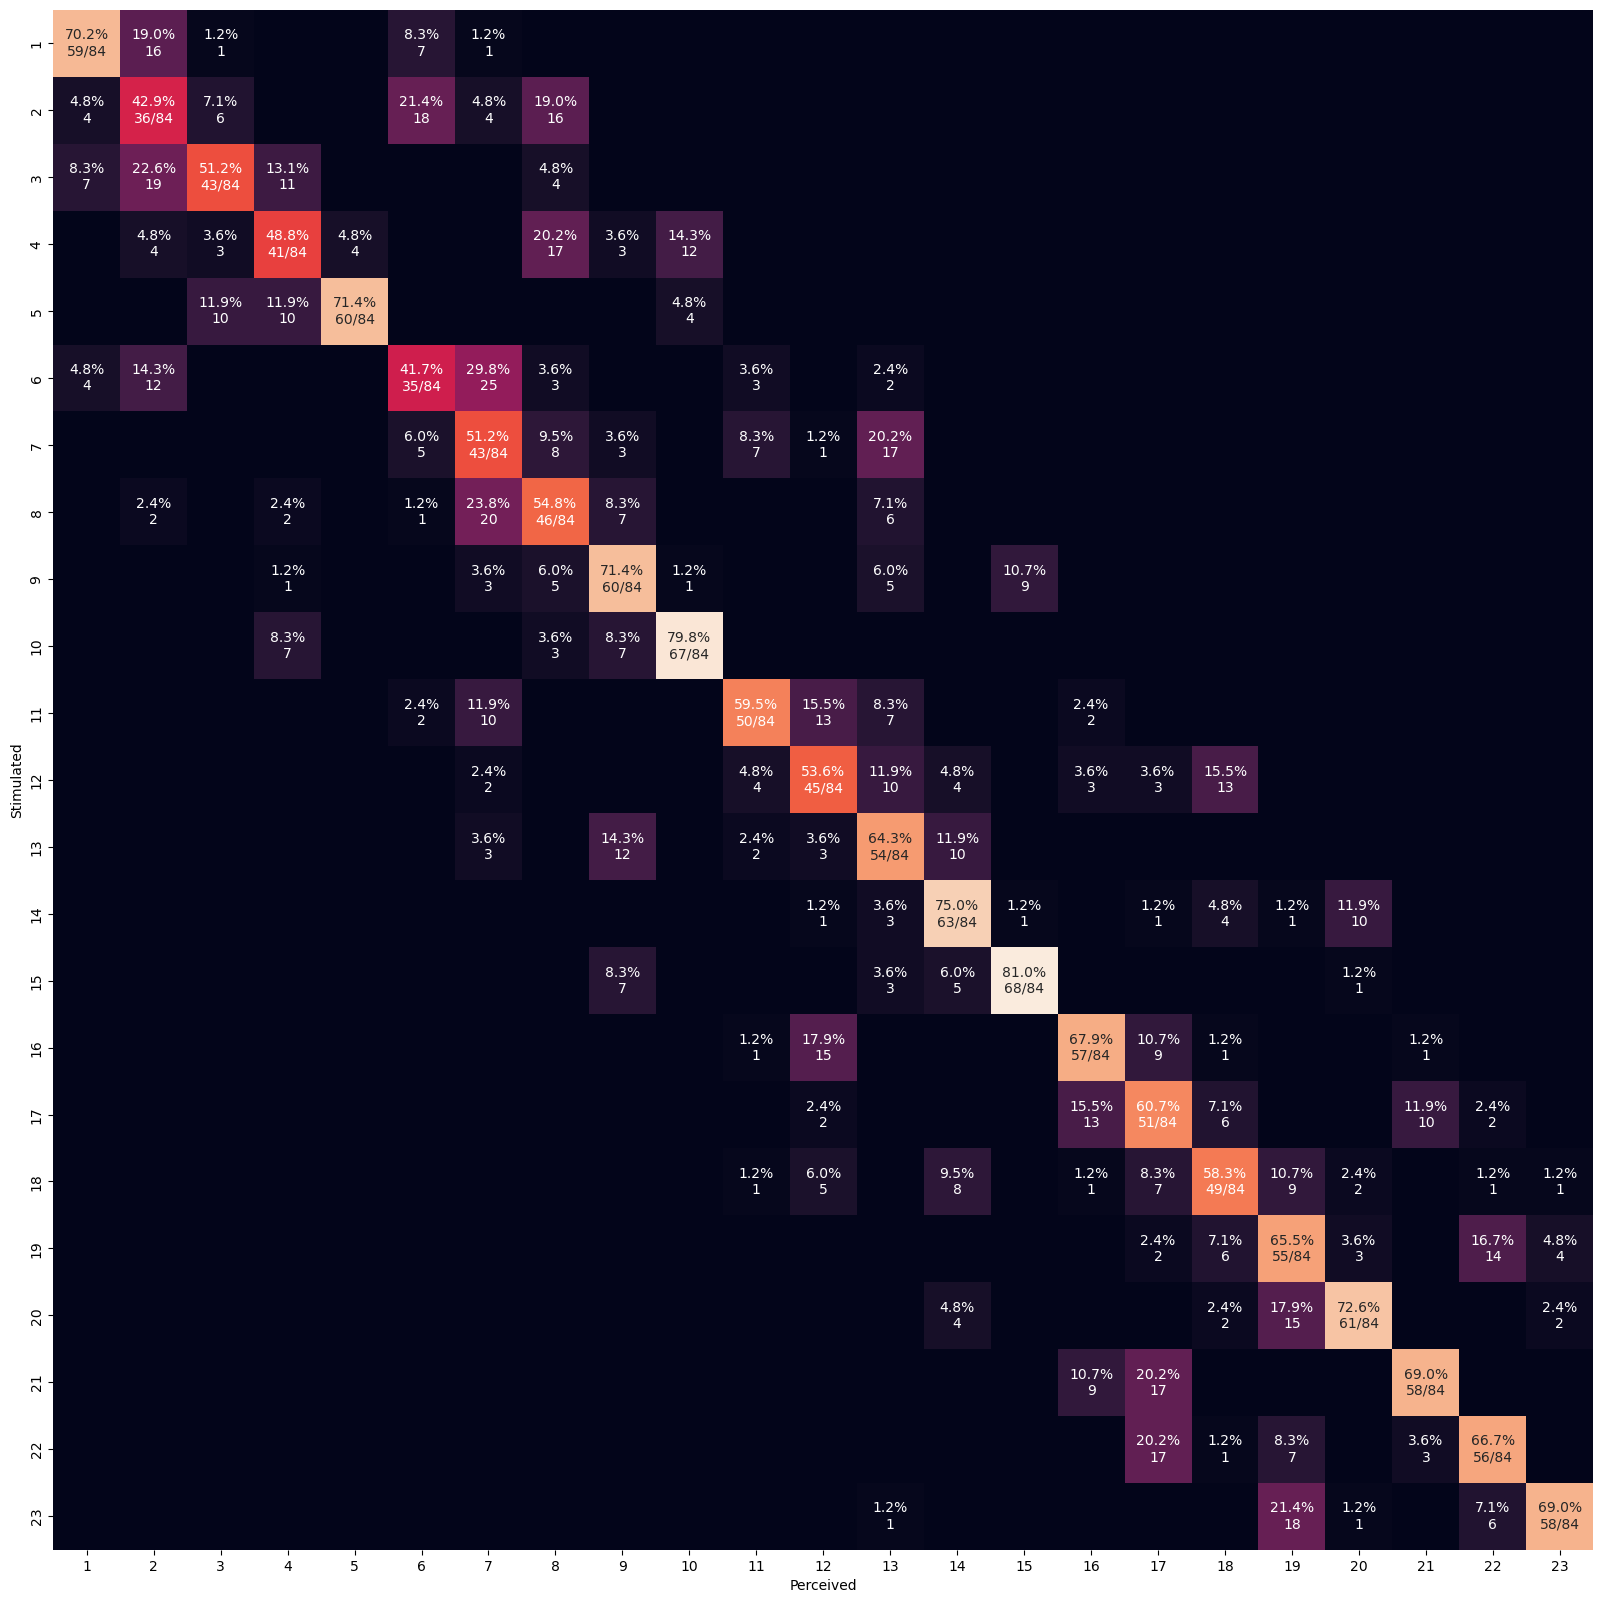

In [5]:
#read the file as pandas matrix
I = pd.read_csv("I.csv", header=None)

#read Es.csv and create an histogram of each column
Es = pd.read_csv("Es.csv", header=None)

#ytrue is the first column of I, ypred is the second column
y_true = I[0]
y_pred = I[1]

#labels sre the first 23 integers, with 0 as the first
labels = list(range(1,24))

#test the function
axis=cm_analysis_all(y_true, y_pred, "cmall.png", labels, ymap=None, figsize=(30,20),axis=None)

0 0


C:\Users\HP\AppData\Local\Temp\ipykernel_12404\2908379375.py:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


0 1


C:\Users\HP\AppData\Local\Temp\ipykernel_12404\2908379375.py:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


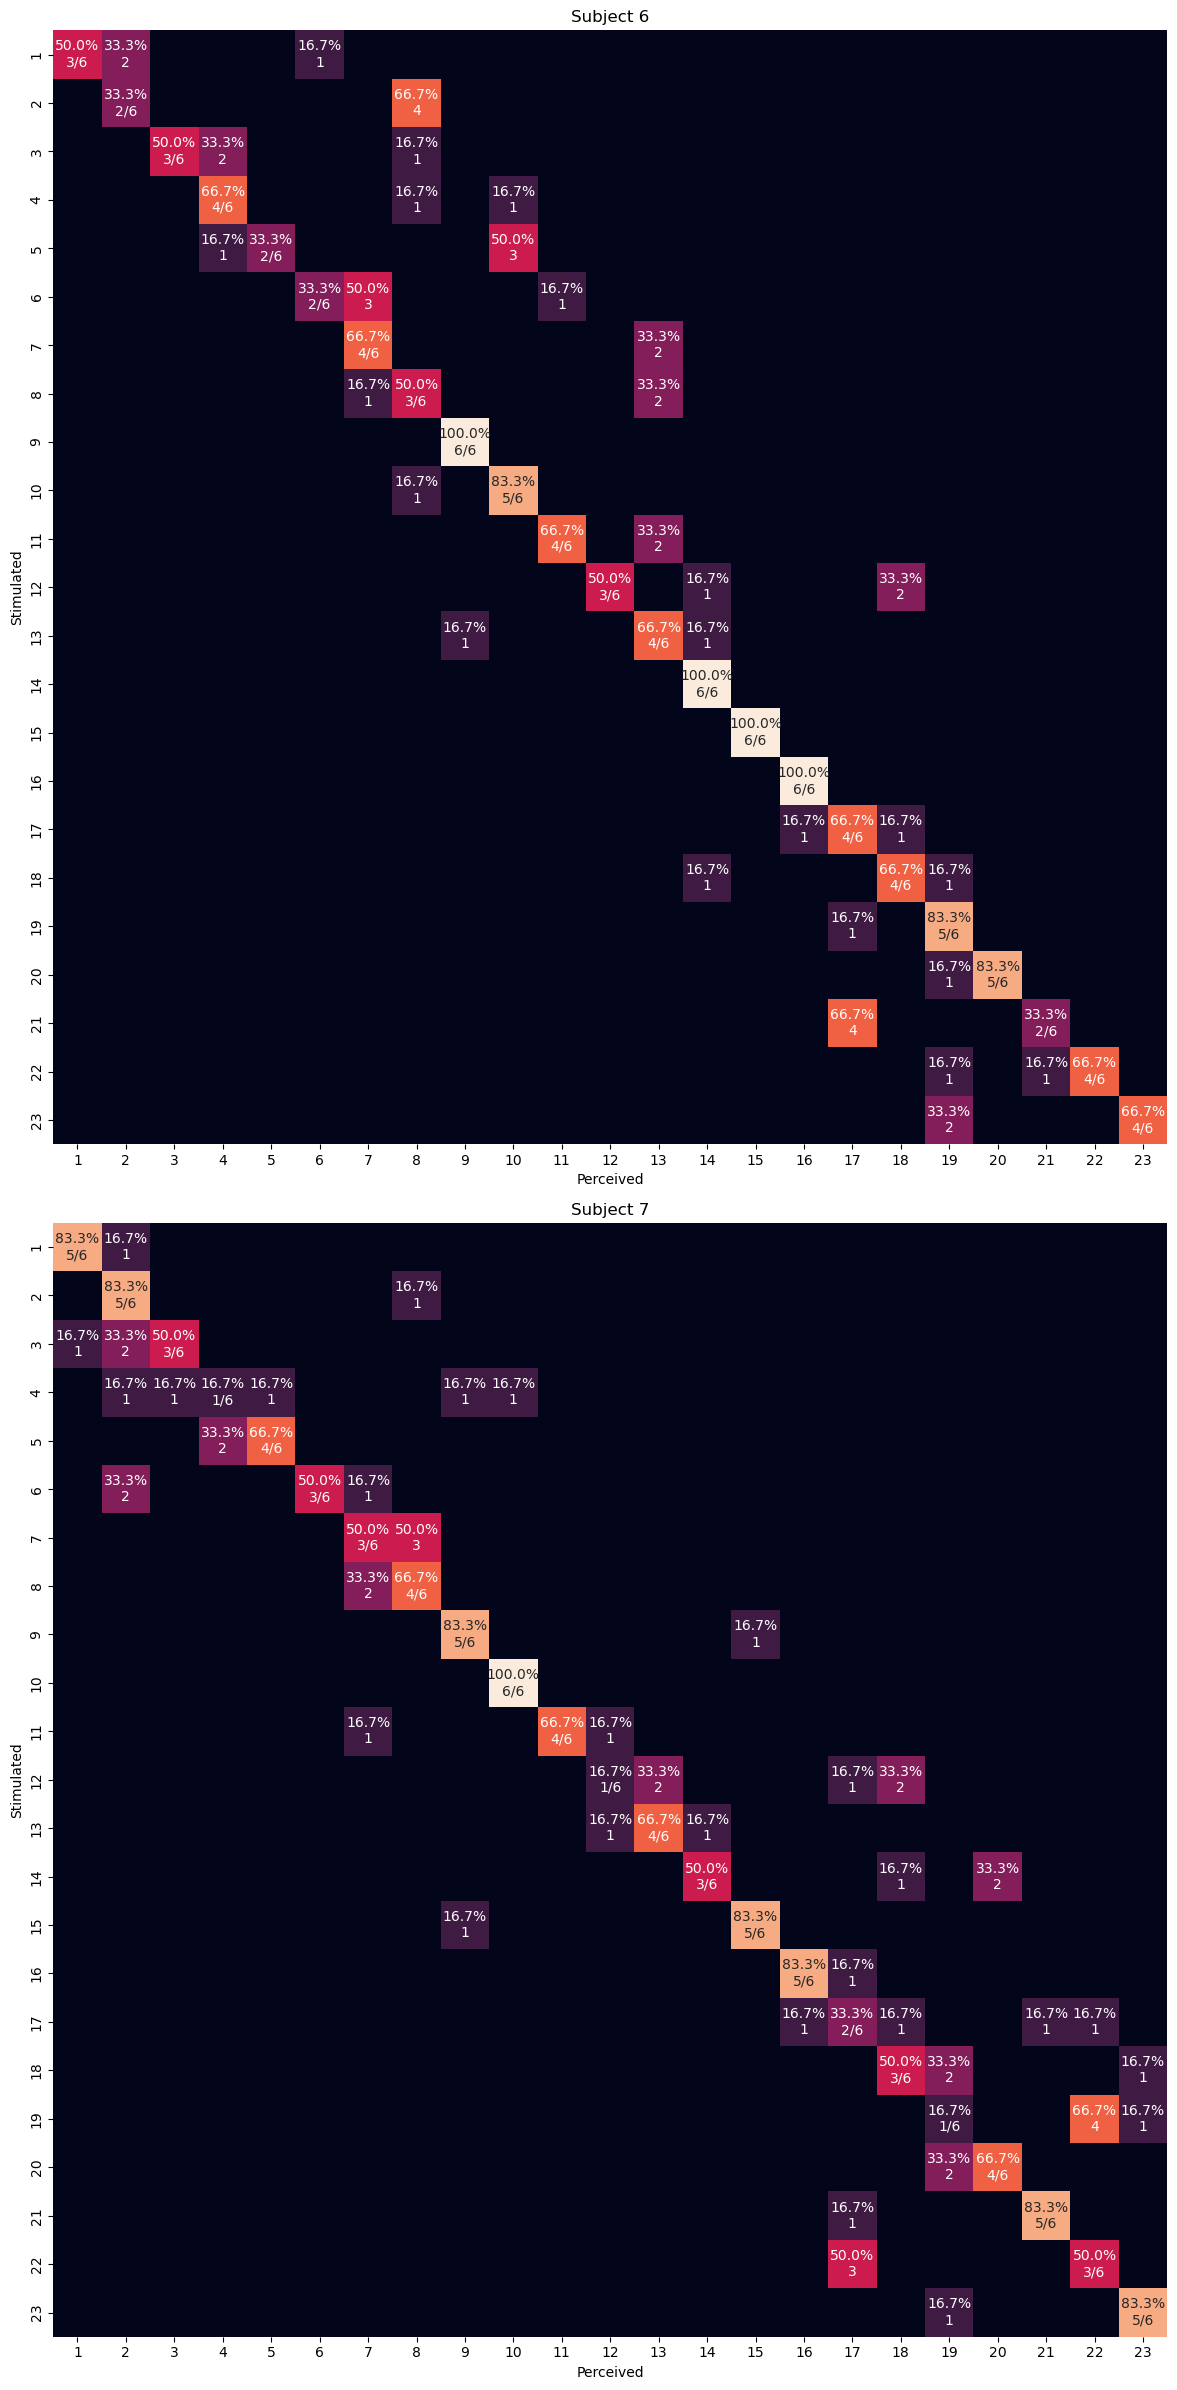

In [6]:
#get all the files inside the subjresults folder
subjs=[6,7]

#create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 24))

counter=0
for subj in subjs:
    I = pd.read_csv("subjresults/"+"I_S"+str(subj)+".csv", header=None)

    #in the first subplot, plot the confusion matrix
    #ytrue is the first column of I, ypred is the second column
    y_true = I[0]
    y_pred = I[1]

    #labels sre the first 23 integers, with 0 as the first
    labels = list(range(1,24))

    #get the next axis
    print(counter//3, counter%3)
    ax = axs[counter%3]
    
    #create cmap
    cm=cm_analysis_all(y_true, y_pred, "confusion_matrix_S"+str(subj)+".png", labels,figsize=(10,10),axis=ax)
    
    #title the current axis with the subject number
    ax.set_title("Subject "+str(subj))

    #in the second subplot, histogram of distances
    counter+=1

#plot a colorbar in the right side of the figure with limits  from 0 to 6 and colormap rocket


#adjust the layout
plt.subplots_adjust(wspace=0.001)
plt.tight_layout()


#save the figure
plt.savefig("subj_p1.svg", format='svg', dpi=300, transparent=True)
plt.savefig("subj_p1.png", format='png', dpi=300, transparent=True)





0 0


C:\Users\HP\AppData\Local\Temp\ipykernel_12404\2908379375.py:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


0 1


C:\Users\HP\AppData\Local\Temp\ipykernel_12404\2908379375.py:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


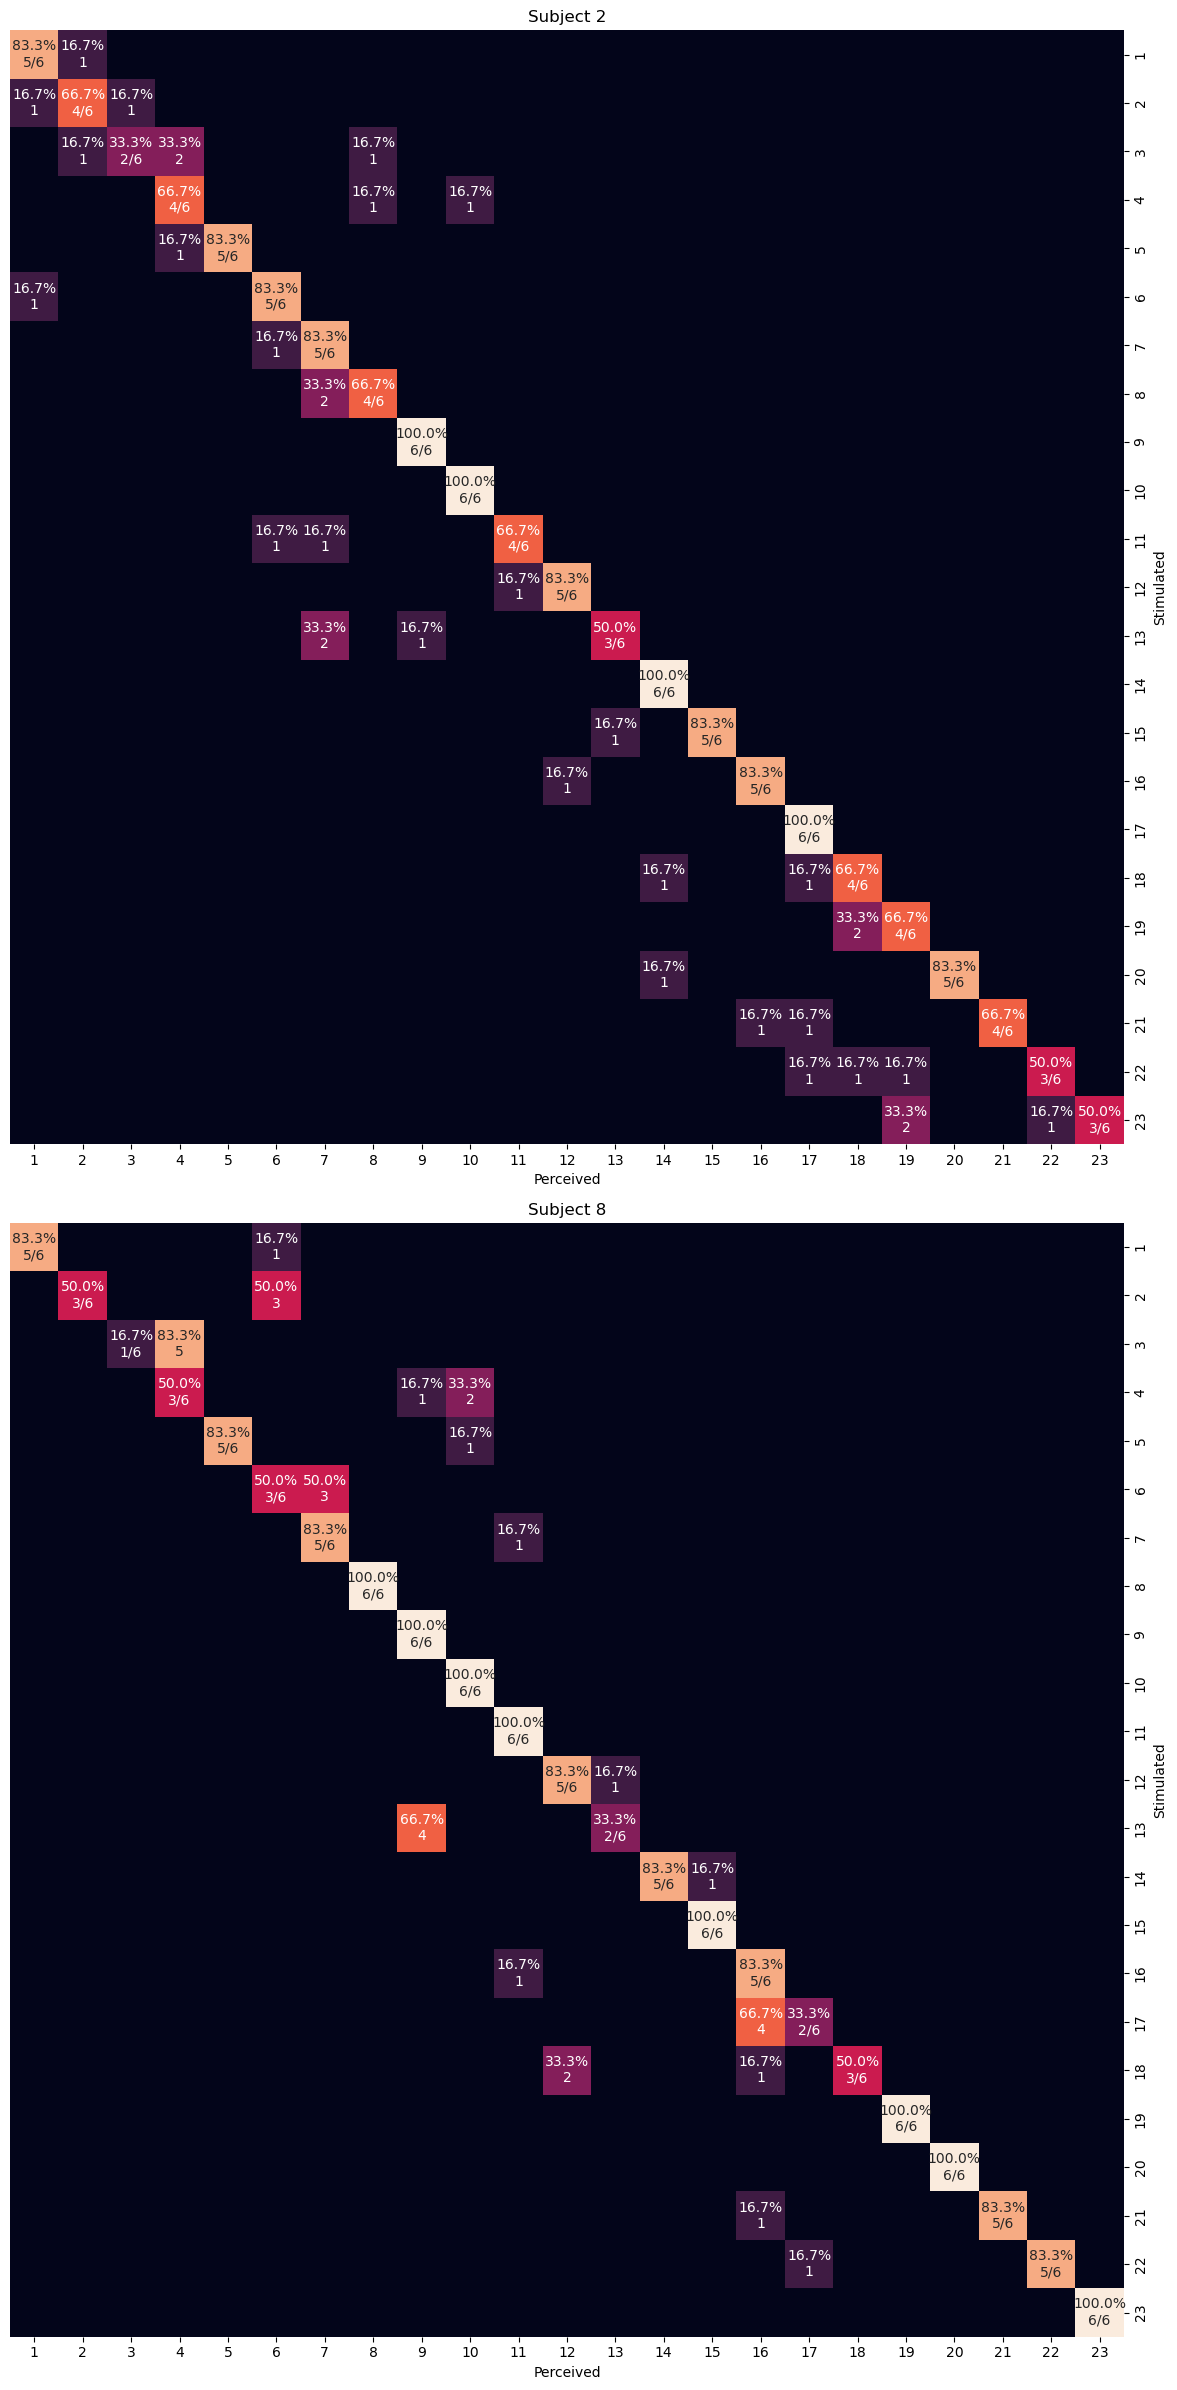

In [7]:
#get all the files inside the subjresults folder
subjs=[2,8]

#create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 24))

counter=0
for subj in subjs:
    I = pd.read_csv("subjresults/"+"I_S"+str(subj)+".csv", header=None)

    #in the first subplot, plot the confusion matrix
    #ytrue is the first column of I, ypred is the second column
    y_true = I[0]
    y_pred = I[1]

    #labels sre the first 23 integers, with 0 as the first
    labels = list(range(1,24))

    #get the next axis
    print(counter//3, counter%3)
    ax = axs[counter%3]
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    #create cmap
    cm=cm_analysis_all(y_true, y_pred, "confusion_matrix_S"+str(subj)+".png", labels,figsize=(10,10),axis=ax)
    
    #title the current axis with the subject number
    ax.set_title("Subject "+str(subj))

    #in the second subplot, histogram of distances
    counter+=1

#plot a colorbar in the right side of the figure with limits  from 0 to 6 and colormap rocket


#adjust the layout
plt.subplots_adjust(wspace=0.001)
plt.tight_layout()


#save the figure
plt.savefig("subj_p2.svg", format='svg', dpi=300, transparent=True)
plt.savefig("subj_p2.png", format='png', dpi=300, transparent=True)



